In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('happy.csv')
data

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
data.keys() 

Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Standard_Error', 'Economy', 'Family', 'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia_Residual'],
      dtype='object')

In [4]:
data.dtypes # to find the data type

Country               object
Region                object
Happiness_Rank         int64
Happiness_Score      float64
Standard_Error       float64
Economy              float64
Family               float64
Health               float64
Freedom              float64
Trust                float64
Generosity           float64
Dystopia_Residual    float64
dtype: object

In [5]:
data.isnull().sum() # to find null value in columns

Country              0
Region               0
Happiness_Rank       0
Happiness_Score      0
Standard_Error       0
Economy              0
Family               0
Health               0
Freedom              0
Trust                0
Generosity           0
Dystopia_Residual    0
dtype: int64

In [6]:
data.shape #shape to find no. of rows and columns

(158, 12)

In [7]:
data.info() #to find null value


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            158 non-null    object 
 1   Region             158 non-null    object 
 2   Happiness_Rank     158 non-null    int64  
 3   Happiness_Score    158 non-null    float64
 4   Standard_Error     158 non-null    float64
 5   Economy            158 non-null    float64
 6   Family             158 non-null    float64
 7   Health             158 non-null    float64
 8   Freedom            158 non-null    float64
 9   Trust              158 non-null    float64
 10  Generosity         158 non-null    float64
 11  Dystopia_Residual  158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


# EDA 

In [8]:
data.describe() #descripting the data

,Happiness_Rank,Happiness_Score,Standard_Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


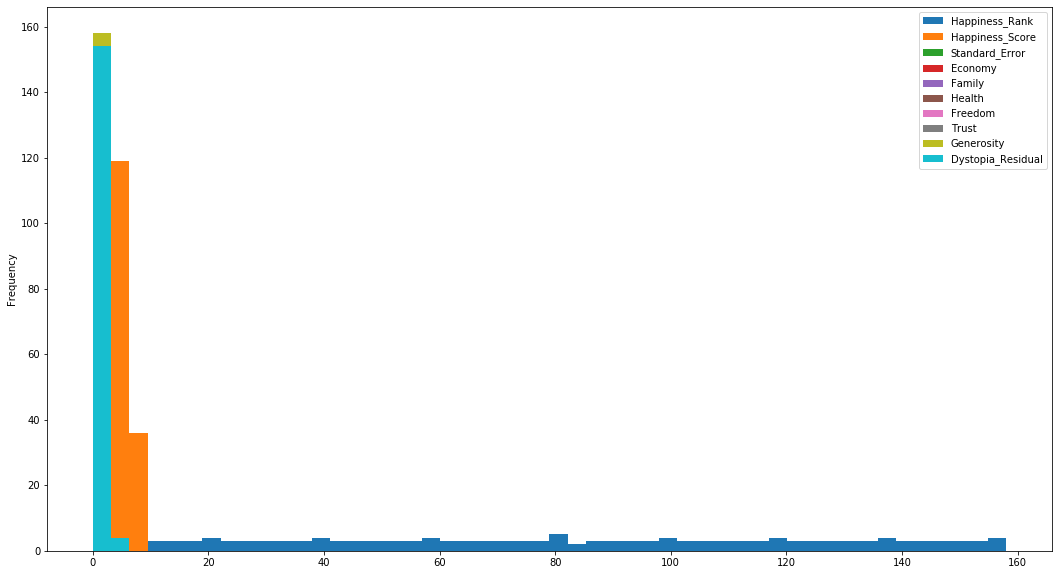

In [9]:
data[ ['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Standard_Error', 'Economy', 'Family',
       'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia_Residual']].plot.hist(figsize=(18,10) ,bins=50,grid=False)

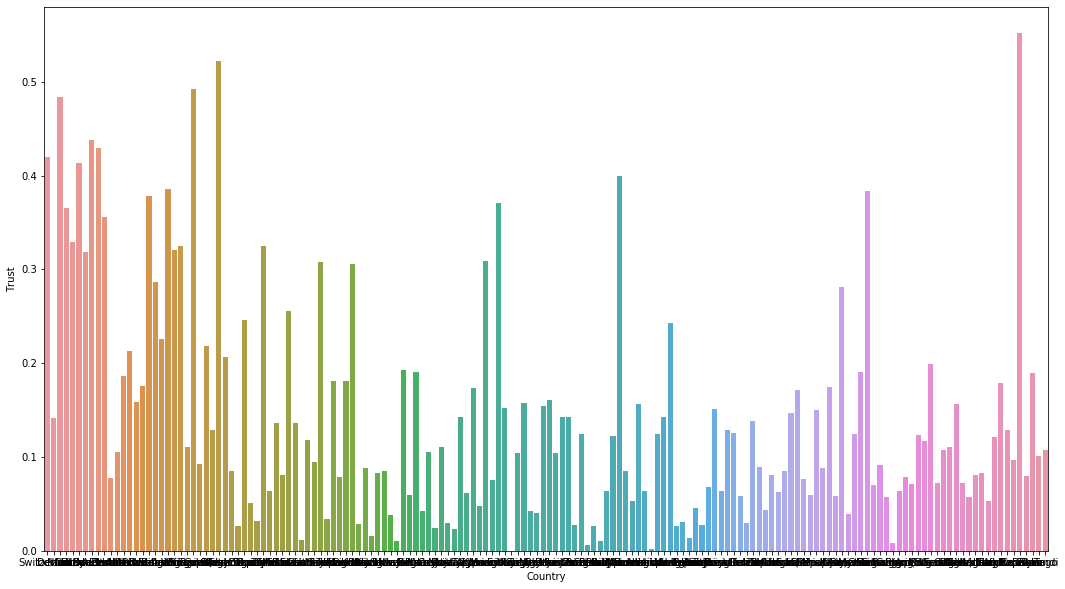

In [10]:
plt.figure(figsize=(18,10))
sb.barplot(x='Country',y='Trust',data=data)
plt.show()

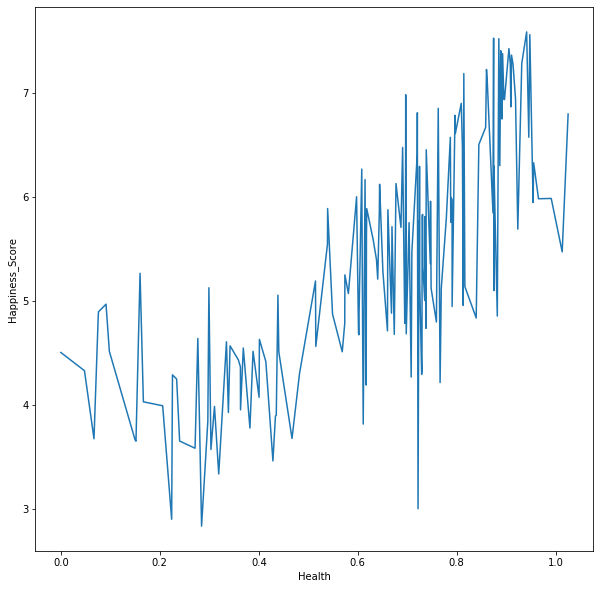

In [11]:
plt.figure(figsize=(10,10))
sb.lineplot(x='Health',y='Happiness_Score',data=data)
plt.show()

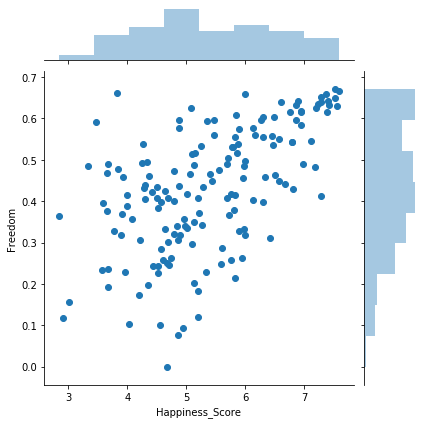

In [12]:
sb.jointplot(x='Happiness_Score',y='Freedom',data=data)

<Figure size 1296x720 with 0 Axes>

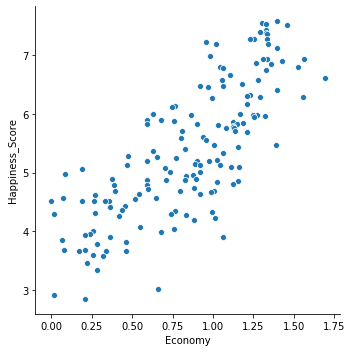

In [46]:
plt.figure(figsize=(18,10))
sb.relplot(x='Economy',y='Happiness_Score',data=data)
plt.show()

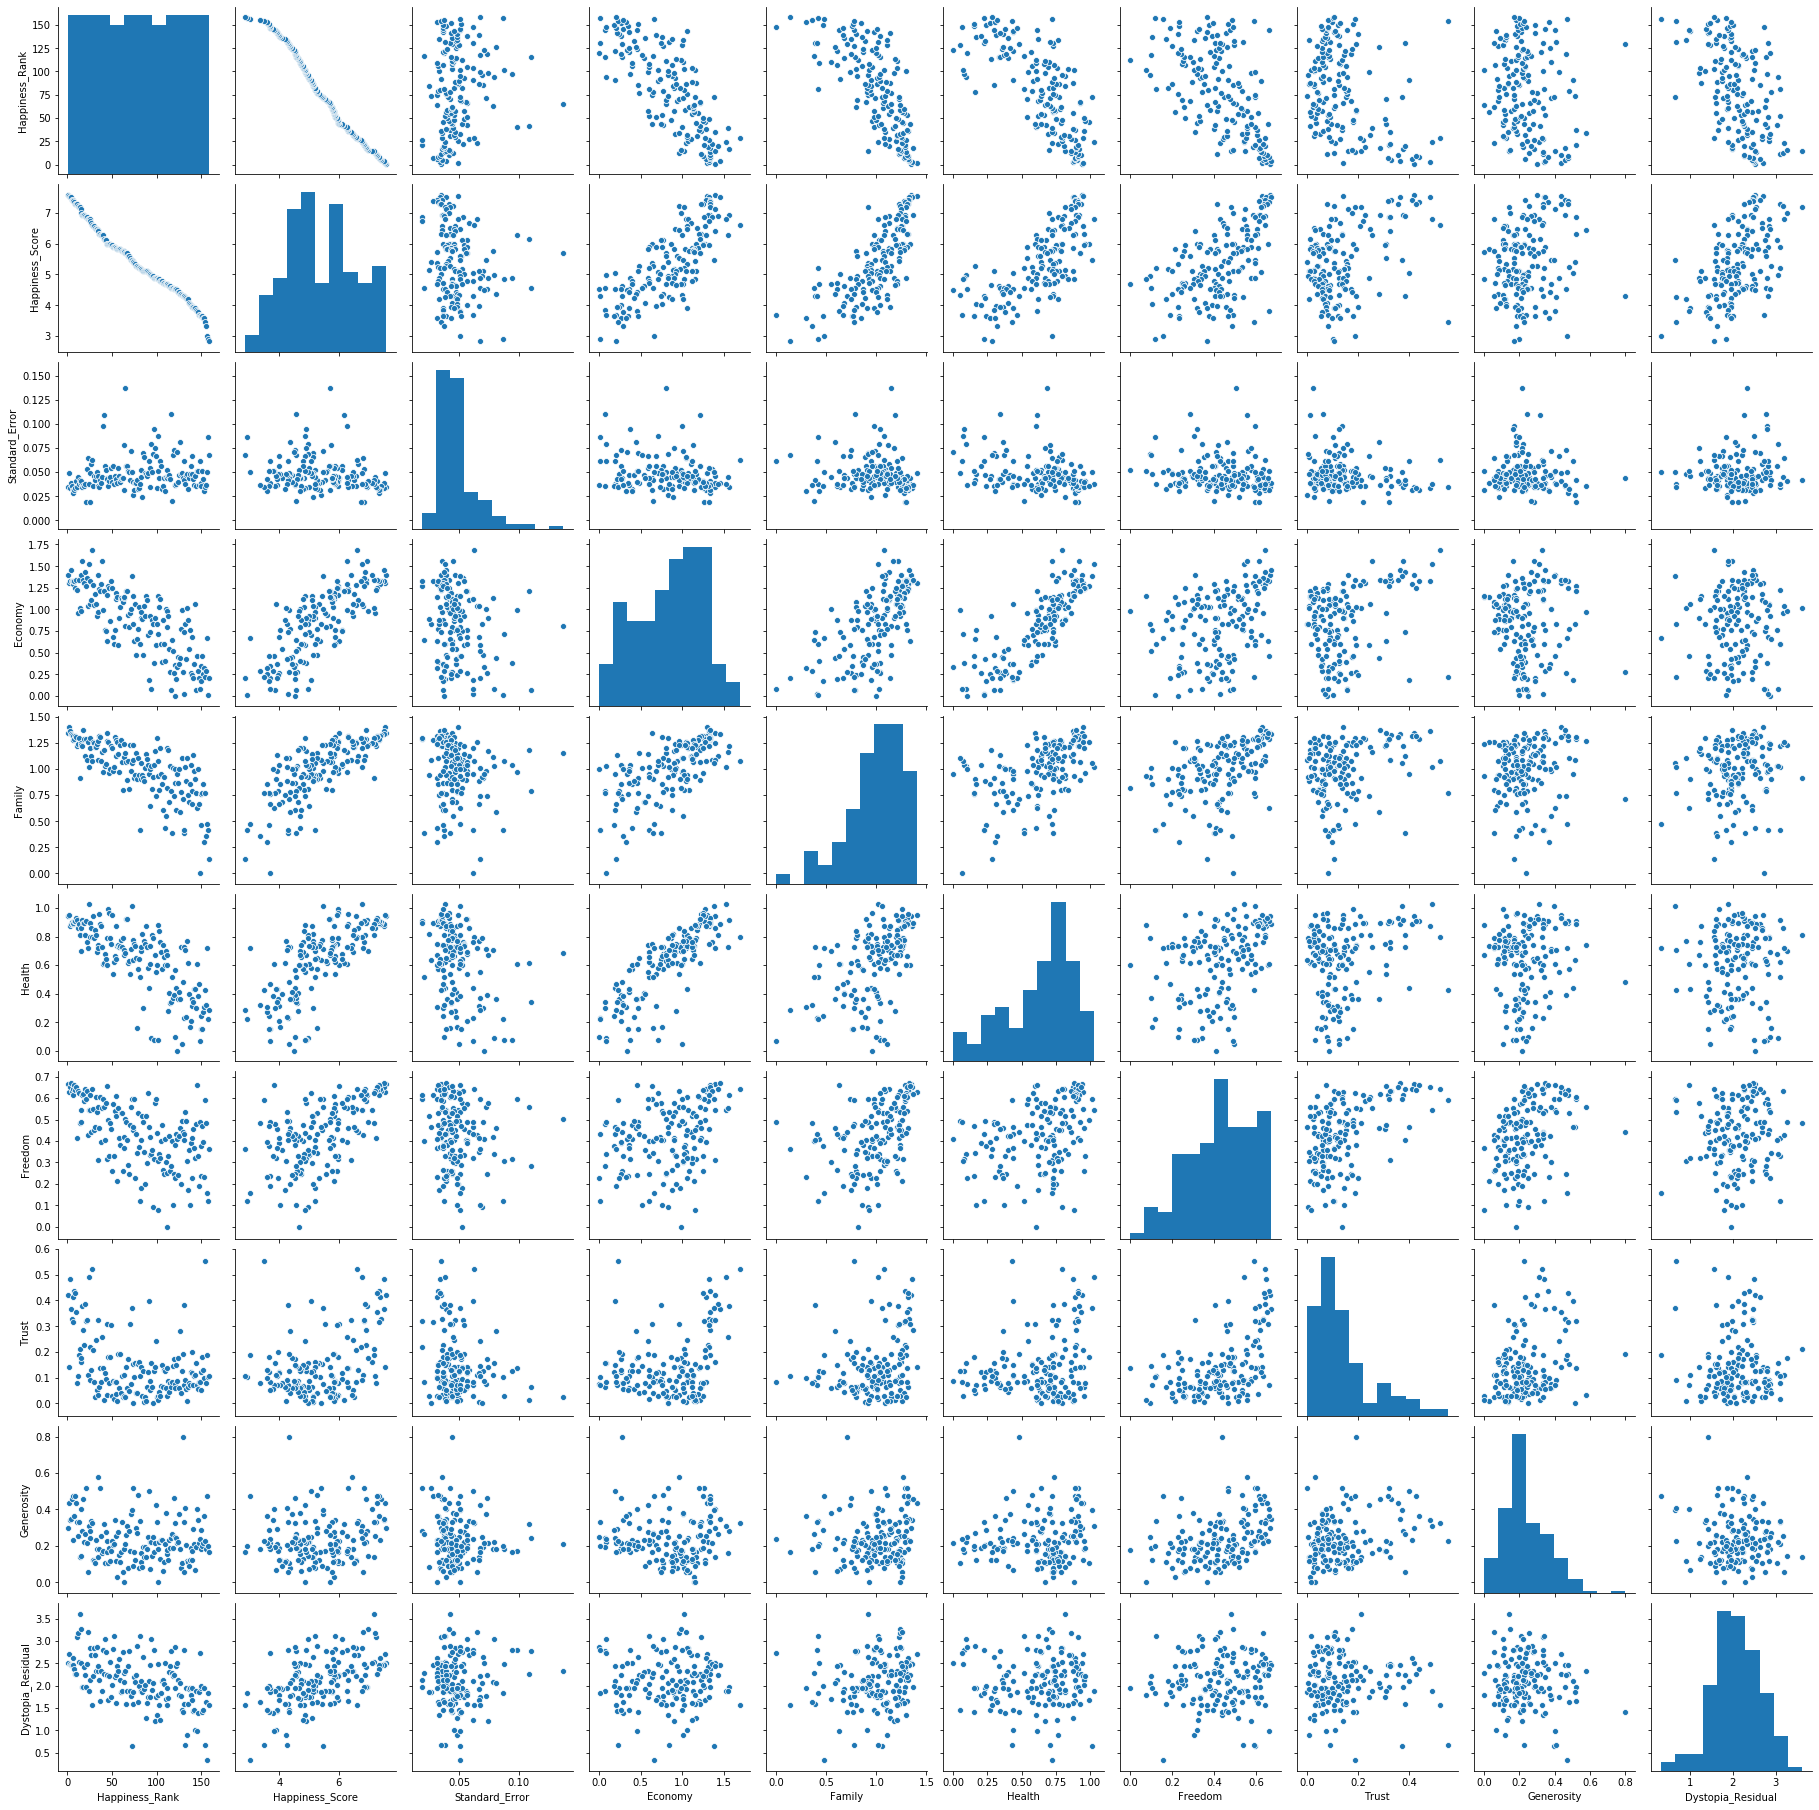

In [13]:
sb.pairplot(data)

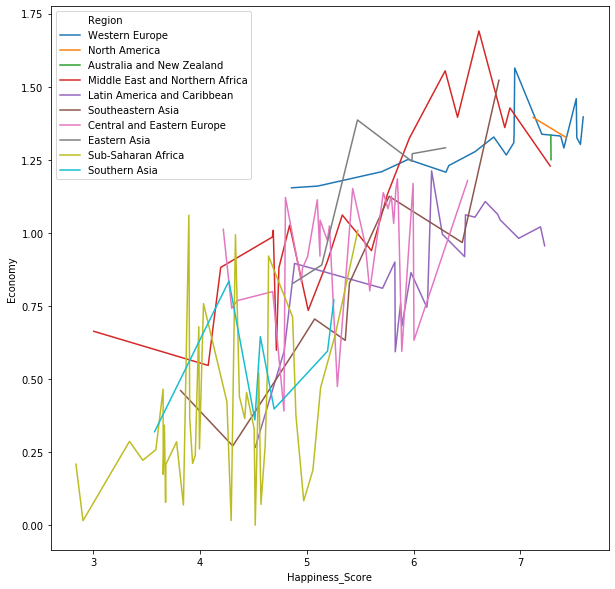

In [14]:
plt.figure(figsize=(10,10))
sb.lineplot(x='Happiness_Score',y='Economy',hue="Region",data=data)
plt.show()

In [15]:
data.corr()

,Happiness_Rank,Happiness_Score,Standard_Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
Happiness_Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness_Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard_Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia_Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

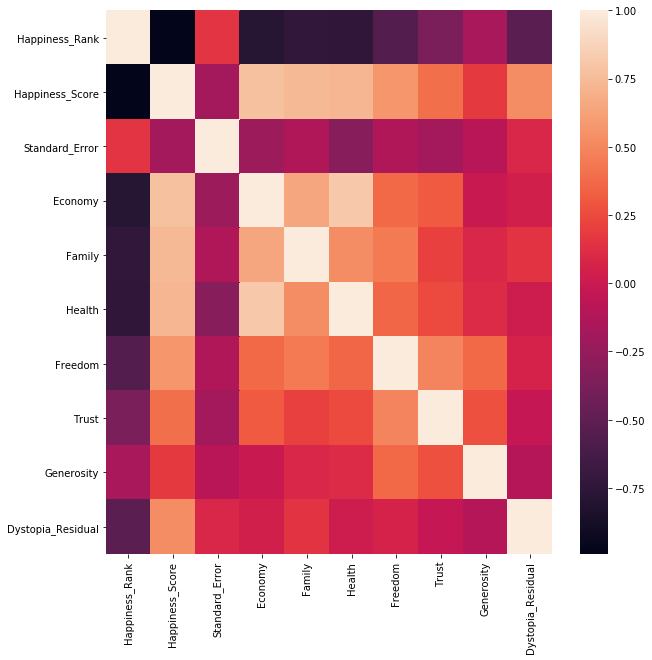

In [16]:
plt.figure(figsize=(10,10))
sb.heatmap(data.corr())
plt.show

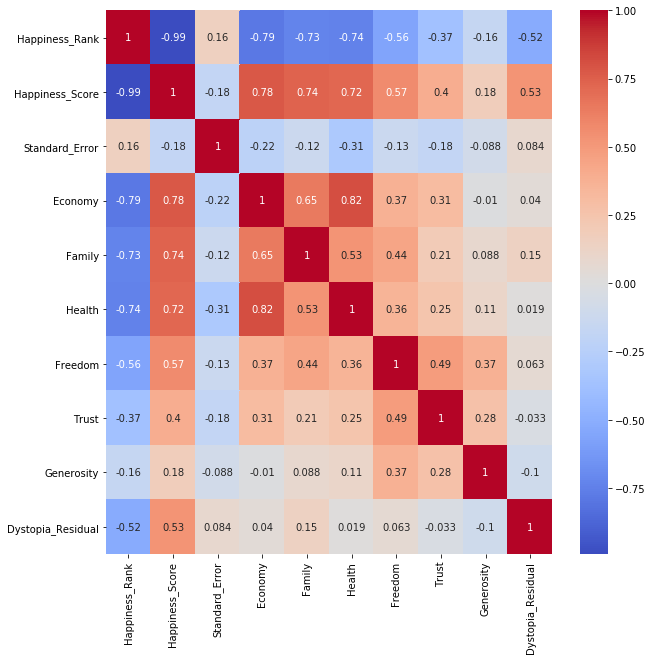

In [17]:
plt.figure(figsize=(10,10))
sb.heatmap(data.corr(),cmap='coolwarm',annot=True)
plt.show()

# Model

In [18]:
le=LabelEncoder()
data['Country']=le.fit_transform(data['Country'])
data['Country']

0      135
1       58
2       37
3      105
4       24
      ... 
153    118
154     13
155    136
156     21
157    141
Name: Country, Length: 158, dtype: int32

In [19]:
data.head()

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,135,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [20]:
data=data.drop('Region',axis=1)
data.head()

,Country,Happiness_Rank,Happiness_Score,Standard_Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,135,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [21]:
data=data.drop('Happiness_Rank',axis=1)
data.head()

,Country,Happiness_Score,Standard_Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,135,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [22]:
x=data.drop('Country',axis=1)
y=data['Country']

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=70)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(110, 9)
(110,)
(48, 9)
(48,)


In [24]:
le=LogisticRegression()
le.fit(x_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
pred=le.predict(x_test)
pred

array([ 97,  51,  52, 105, 135,  56, 123,  56, 107,  32,  21,  58,  44,
       100, 135, 135,  22, 107,  96,  19, 105,   0,  56,  51, 110,  26,
        68,  19,  21, 107,  36,  22,  58,  48,  21,  19,  51,  21,  56,
       146,   5,  32,  91, 135,  56, 123, 100, 123])

In [28]:
#MultinomialNB

mnb=MultinomialNB()
mnb.fit(x_train,y_train)
pred=mnb.predict(x_test)
print(pred)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[ 64  64  91  64  64  64  64  64  91  18  91  64  91  64  91  64 135  91
  91  58  64  91  58  64  18  91  64  64  91  91 153 123  64  64  91  64
  64  91  58  18  91  91  91  64  64  64  58 105]
0.0
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       1.0
           9       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       1.0
          12       0.00      0.00      0.00       1.0
          18       0.00      0.00      0.00       0.0
          25       0.00      0.00      0.00       1.0
          30       0.00      0.00      0.00       1.0
          33       0.00      0.00      0.00       1.0
          34       0.00      0.00      0.00       1.0
          35       0.00      0.00      0.00       1.0
          37       0.00      0.00      0.00       1.0
          38       0.00      0.

In [34]:
#RandomForestRegressor

model = RandomForestRegressor(n_estimators = 100)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(y_pred)

# finding the mean squared error and variance
mse = mean_squared_error(y_test, y_pred)
print("RMSE :",np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test,y_pred))
print("Result :",model.score(x_train, y_train))

[ 80.3   86.83  88.81  81.58  61.58 104.52 110.24  85.93  62.62 100.89
  85.43  65.62  66.94  62.54  87.64  73.46  64.71  80.31 101.77  57.91
  91.99  89.57 101.57  94.36 101.94  76.22  98.16  82.67  60.51  88.11
  92.78  57.52  79.05  78.05  53.21 100.73 105.06  40.13  89.48  90.7
  78.1   60.39  69.96  76.24 105.18  88.63  55.49 101.1 ]
RMSE : 46.30288073741561
Variance score: -0.08
Result : 0.847682128200624


In [37]:
#DecisionTreeRegression

model = DecisionTreeRegressor()
model.fit(x_train,y_train)

# predicting the test set results
Y_pred = model.predict(x_test)
print(Y_pred)

print(" RMSE : " , np.sqrt(((y_test - y_pred)**2).sum()/len(y_test)))

[ 83. 119.  15. 135.  24. 132.  86. 104.  59.  96. 145. 105.  59. 100.
   7.  49.  66.  16. 141.  64. 135. 141.  88. 154. 151. 139.  74.  86.
 157. 153. 117.  66.  64.  86. 122. 114. 154.  20.  67.  50. 155. 122.
  88.  49. 119.   6.   7. 105.]
 RMSE :  46.30288073741561


In [39]:
#SVR
model = SVR()
model.fit(x_train, y_train)
Y_pred = model.predict(x_test)
print(Y_pred)

#cross validation
score=cross_val_score(model,x,y,cv=5)
print('mean score',score.mean())
print('sd',score.std())

#cross prediction
pred=cross_val_predict(model,x,y,cv=5)
print(pred)

# Calculating the RMSE Score
mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))


[74.27783786 74.15464165 74.89602802 74.77506923 74.92498626 74.59395741
 74.72020666 74.5459996  74.4337003  74.57655783 73.91329657 74.94362588
 74.41267494 74.86340135 74.92987756 74.91263884 73.17357281 74.87780127
 74.74316784 73.53199166 74.87261706 74.12009066 74.54881673 74.28346785
 74.93233516 74.22768077 74.67690954 74.07324778 73.85587679 74.8213598
 74.79142505 72.74934555 74.99114781 74.03673231 73.95633203 74.09883957
 74.46905134 73.73102861 74.05394119 74.14653729 74.29549927 74.41270464
 75.08237637 74.91949459 74.24854179 74.83919602 74.85249555 74.60704013]
mean score -0.039223100664794355
sd 0.043857930242142136
[80.98129554 81.08016853 80.9762432  80.94299817 80.94003393 80.95352465
 80.91221382 80.85959779 80.82569436 80.80834376 80.98859614 81.02239311
 80.85068864 80.8755241  80.77840846 80.89823563 80.39069723 80.5274822
 80.64544939 80.46852114 80.45525967 80.51214447 80.77304942 80.1480269
 80.69117466 80.40815166 80.51824914 79.84083891 80.27020659 80.52943